6813,lena:146,lenb:167
6814,lena:143,lenb:168
6815,lena:142,lenb:168
7035,lena:90,lenb:179


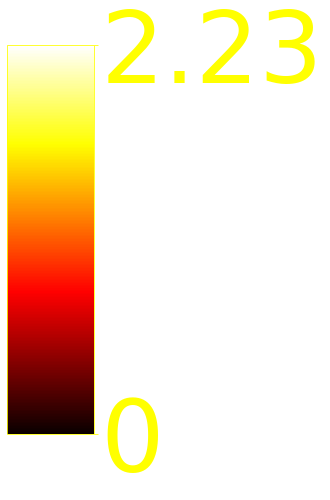

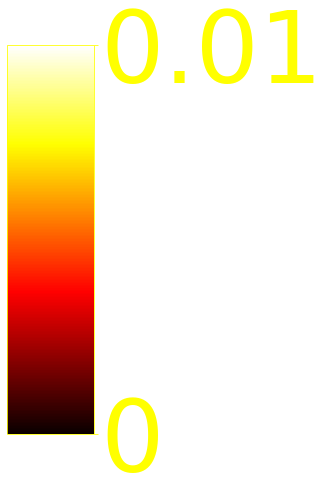

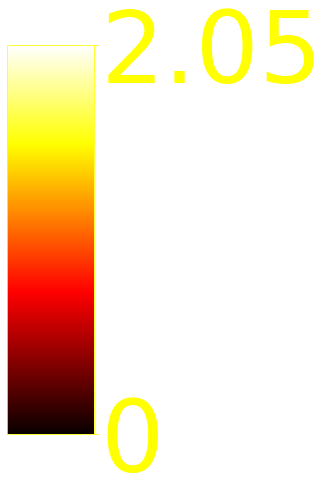

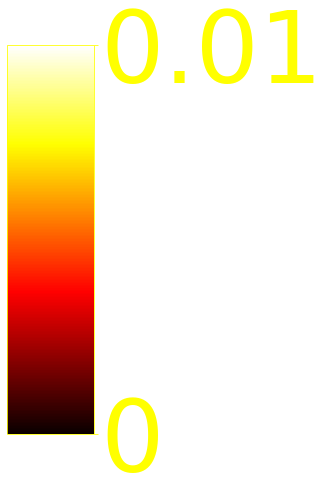

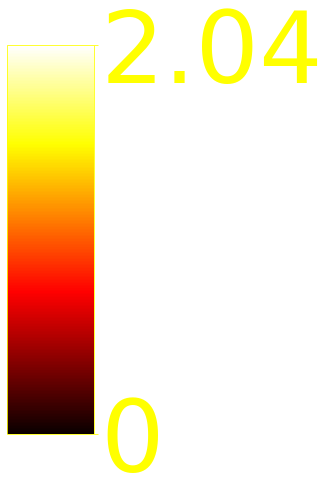

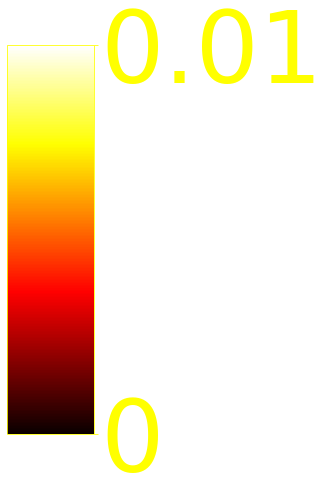

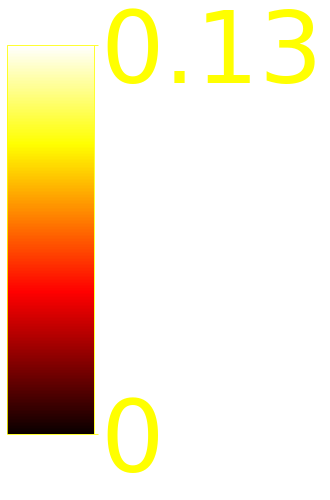

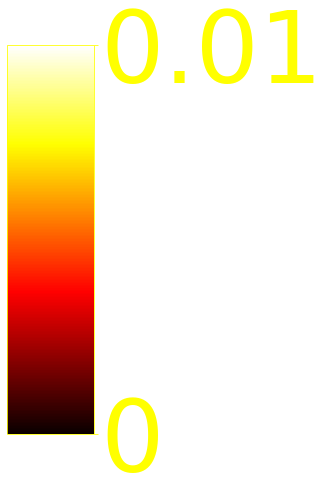

In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
main_path = "./数据/result_data_2D"
save_result_path = "./result_pictures"
fg_color = 'yellow'
if not os.path.exists(save_result_path):
    os.makedirs(save_result_path,exist_ok=True)
with torch.no_grad():
    for i in [6813,6814,6815,7035]:
        if i==7035:
            la = 45
            ra = 45
            lb = 90
            rb = 90
        else:
            la = 73
            ra = 73
            lb = 84
            rb = 84
        if os.path.exists(f"{main_path}/{i}_pred.pkl"):
            pred = torch.load(f"{main_path}/{i}_pred.pkl")
            gt = torch.load(f"{main_path}/{i}_gt.pkl")
        else:
            print(i,"error1")
            continue
        if os.path.exists(f"{main_path}/{i}_Ki_ori_method.npy"):
            pred_Ki = np.load(f"{main_path}/{i}_Ki_pred.npy")
            gt_Ki = np.load(f"{main_path}/{i}_Ki_gt.npy")
            ori_method_Ki = np.load(f"{main_path}/{i}_Ki_ori_method.npy")
        else:
            print(i,"error2")
            continue
        if os.path.exists(f"{main_path}/{i}_pred_compare.pkl"):
            without_model_pred = torch.load(f"{main_path}/{i}_pred_compare.pkl")
            without_model_pred_Ki = np.load(f"{main_path}/{i}_Ki_pred_compare.npy")
        else:
            print(i,"error3")
            continue
        out_gt_SUV = gt[-1].detach().cpu().numpy()
        out_pred_SUV = pred[-1].detach().cpu().numpy()
        out_without_model_SUV = without_model_pred[-1].detach().cpu().numpy()
        out_gt_SUV = np.maximum(out_gt_SUV, 0)
        out_without_model_SUV = np.maximum(out_without_model_SUV, 0)
        out_pred_SUV = np.maximum(out_pred_SUV, 0)
        maxval = np.max(out_gt_SUV)
        out_without_model_SUV = np.minimum(out_without_model_SUV,maxval)
        out_pred_SUV = np.minimum(out_pred_SUV,maxval)
        
        mask = out_gt_SUV>0.01
        locs = np.where(mask)
        mina = np.min(locs[0])
        maxa = np.max(locs[0])
        minb = np.min(locs[1])
        maxb = np.max(locs[1])
        print(f"{i},lena:{maxa-mina},lenb:{maxb-minb}")
        tick_font_size = 100
        vmax = np.max(out_gt_SUV)
        a = np.array([[0,1]])
        pl.figure(figsize=(1.5, 9))
        img = pl.imshow(a, cmap="hot",vmin=0,vmax=vmax)
        pl.gca().set_visible(False)
        cax = pl.axes([0.1, 0.2, 0.8, 0.6])
        cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
        cbar.ax.tick_params(labelsize=tick_font_size)
        cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)],color=fg_color)

        # set colorbar tick color
        cbar.ax.yaxis.set_tick_params(color=fg_color)

        # set colorbar edgecolor 
        cbar.outline.set_edgecolor(fg_color)

        # set colorbar ticklabels
        pl.setp(pl.getp(cbar.ax.axes, 'yticklabels'), color=fg_color)
        pl.savefig(f'{save_result_path}/slice{i}_SUV_colorbar.png',bbox_inches='tight',transparent=True, pad_inches=0)
        plt.imsave(f'{save_result_path}/slice{i}_gt_SUV.png',out_gt_SUV[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt_SUV),cmap='hot')
        plt.imsave(f'{save_result_path}/slice{i}_without_model_SUV.png',out_without_model_SUV[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt_SUV),cmap='hot')
        plt.imsave(f'{save_result_path}/slice{i}_pred_SUV.png',out_pred_SUV[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt_SUV),cmap='hot')
        out_gt = gt_Ki[0].reshape(256,256)
        out_ori_method_Ki = ori_method_Ki[0].reshape(256,256)
        out_pred_Ki = pred_Ki[0].reshape(256,256)
        out_gt = np.maximum(out_gt, 0)
        out_ori_method_Ki = np.maximum(out_ori_method_Ki, 0)
        out_pred_Ki = np.maximum(out_pred_Ki, 0)
        without_model_pred_Ki = np.maximum(without_model_pred_Ki, 0)
        # maxval = np.max([np.max(out_gt),np.max(out_ori_method_Ki),np.max(out_pred_Ki)])
        maxval = np.max(out_gt)
        out_ori_method_Ki = np.minimum(out_ori_method_Ki,maxval)
        out_pred_Ki = np.minimum(out_pred_Ki,maxval)
        without_model_pred_Ki = np.minimum(without_model_pred_Ki,maxval)
        
        vmax = np.max(out_gt)
        a = np.array([[0,1]])
        pl.figure(figsize=(1.5, 9))
        img = pl.imshow(a, cmap="hot",vmin=0,vmax=vmax)
        pl.gca().set_visible(False)
        cax = pl.axes([0.1, 0.2, 0.8, 0.6])
        cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
        cbar.ax.tick_params(labelsize=tick_font_size)
#             cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
        cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)],color=fg_color)

        # set colorbar tick color
        cbar.ax.yaxis.set_tick_params(color=fg_color)

        # set colorbar edgecolor 
        cbar.outline.set_edgecolor(fg_color)

        # set colorbar ticklabels
        pl.setp(pl.getp(cbar.ax.axes, 'yticklabels'), color=fg_color)
        pl.savefig(f'{save_result_path}/slice{i}_Ki_colorbar.png',bbox_inches='tight',transparent=True, pad_inches=0)
        
        plt.imsave(f'{save_result_path}/slice{i}_Ki_gt.png',out_gt[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt),cmap='hot')
        plt.imsave(f'{save_result_path}/slice{i}_Ki_ori.png',out_ori_method_Ki[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt),cmap='hot')
        plt.imsave(f'{save_result_path}/slice{i}_Ki_pred.png',out_pred_Ki[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt),cmap='hot')
        plt.imsave(f'{save_result_path}/slice{i}_Ki_without_model.png',without_model_pred_Ki[(mina+maxa)//2-la:(mina+maxa)//2+ra,(minb+maxb)//2-lb:(minb+maxb)//2+rb],vmin=0,vmax=np.max(out_gt),cmap='hot')


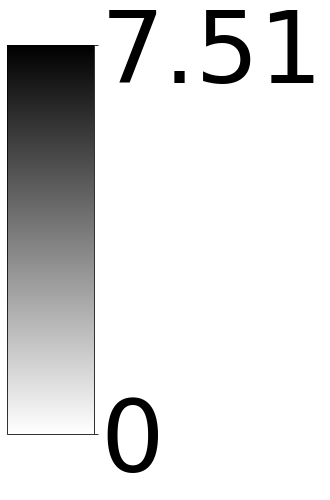

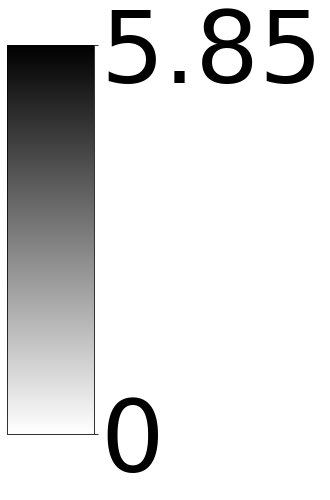

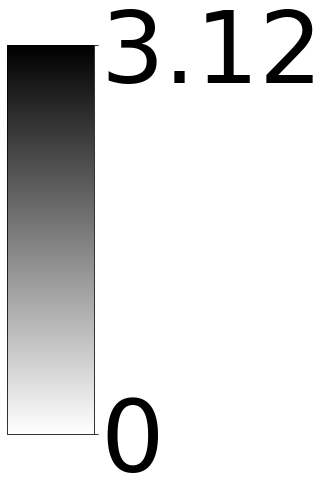

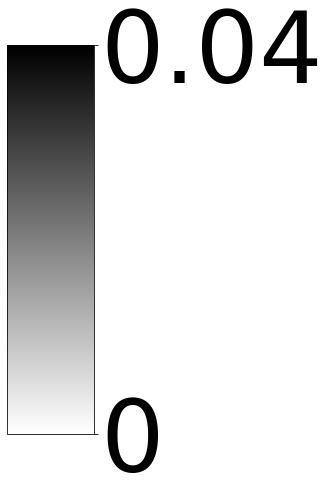

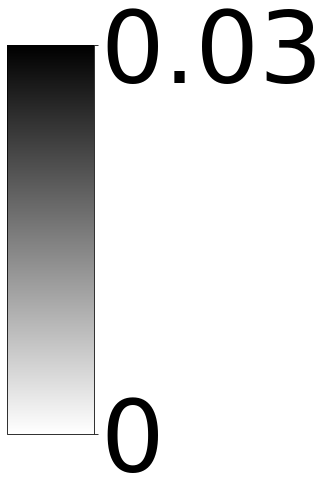

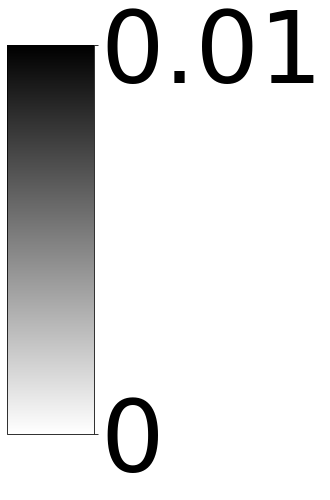

In [2]:
import pylab as pl
import numpy as np
gt_stack = []
gt_mask_stack = []
gt_Ki_stack = []
ori_method_Ki_stack = []
pred_Ki_stack = []
pred_stack = []
without_model_pred_stack = []
without_model_pred_Ki_stack = []
is_stack = True
main_path = "./数据/result_data_3D"
save_result_path = "./result_pictures"

for i in range(7242,7242+71):
    if os.path.exists(f"{main_path}/{i}_pred.pkl"):
        pred = torch.load(f"{main_path}/{i}_pred.pkl")
        gt = torch.load(f"{main_path}/{i}_gt.pkl")
    if os.path.exists(f"{main_path}/{i}_Ki_ori_method.npy"):
        pred_Ki = np.load(f"{main_path}/{i}_Ki_pred.npy")
        gt_Ki = np.load(f"{main_path}/{i}_Ki_gt.npy")
        ori_method_Ki = np.load(f"{main_path}/{i}_Ki_ori_method.npy")
    if os.path.exists(f"{main_path}/{i}_pred_compare.pkl"):
        without_model_pred = torch.load(f"{main_path}/{i}_pred_compare.pkl")
        without_model_pred_Ki = np.load(f"{main_path}/{i}_Ki_pred_compare.npy")
    out_gt = gt_Ki[0].reshape(256,256)
    out_ori_method_Ki = ori_method_Ki[0].reshape(256,256)
    out_pred_Ki = pred_Ki[0].reshape(256,256)
    out_gt = np.maximum(out_gt, 0)
    out_ori_method_Ki = np.maximum(out_ori_method_Ki, 0)
    out_pred_Ki = np.maximum(out_pred_Ki, 0)
    without_model_pred_Ki = np.maximum(without_model_pred_Ki, 0)
    out_pred_Ki = out_pred_Ki
    out_ori_method_Ki = out_ori_method_Ki
    out_gt = out_gt
    tmpgt = gt[-1,:,:].detach().cpu().numpy()
    mask = tmpgt>0.03
    gt_mask_stack.append(mask)
    gt_stack.append(gt[-1].detach().cpu().numpy())
    pred_stack.append(pred[-1].detach().cpu().numpy())
    gt_Ki_stack.append(out_gt)
    ori_method_Ki_stack.append(out_ori_method_Ki)
    pred_Ki_stack.append(out_pred_Ki)
    without_model_pred_stack.append(without_model_pred[-1].detach().cpu().numpy())
    without_model_pred_Ki_stack.append(without_model_pred_Ki)
gt_stack = np.stack(gt_stack)
gt_mask_stack = np.stack(gt_mask_stack)
gt_Ki_stack = np.stack(gt_Ki_stack)
ori_method_Ki_stack = np.stack(ori_method_Ki_stack)
pred_Ki_stack = np.stack(pred_Ki_stack)
pred_stack = np.stack(pred_stack)
without_model_pred_Ki_stack = np.stack(without_model_pred_Ki_stack)
without_model_pred_stack = np.stack(without_model_pred_stack)
z,x,y = gt_stack.shape
locs = np.where(gt_mask_stack[z//2,:,:])
mina = np.min(locs[0])
maxa = np.max(locs[0])
minb = np.min(locs[1])
maxb = np.max(locs[1])
plt.imsave(f"{save_result_path}/gt_SUV_z.png",gt_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_stack[z//2,:,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/gt_Ki_z.png",gt_Ki_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_Ki_stack[z//2,:,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/pred_Ki_z.png",pred_Ki_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_Ki_stack[z//2,:,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/ori_method_Ki_z.png",ori_method_Ki_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_Ki_stack[z//2,:,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/without_model_pred_Ki_z.png",without_model_pred_Ki_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_Ki_stack[z//2,:,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/pred_SUV_z.png",pred_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_stack[z//2,:,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/without_model_pred_SUV_z.png",without_model_pred_stack[z//2,(mina+maxa)//2-60:(mina+maxa)//2+60,(minb+maxb)//2-92:(minb+maxb)//2+93],vmin=0,vmax=np.max(gt_stack[z//2,:,:]),cmap='gray_r')
locs = np.where(gt_mask_stack[:,x//2,:])
mina = np.min(locs[0])
maxa = np.max(locs[0])
minb = np.min(locs[1])
maxb = np.max(locs[1])
plt.imsave(f"{save_result_path}/gt_SUV_x.png",gt_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_stack[:,x//2,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/gt_Ki_x.png",gt_Ki_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_Ki_stack[:,x//2,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/pred_Ki_x.png",pred_Ki_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_Ki_stack[:,x//2,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/ori_method_Ki_x.png",ori_method_Ki_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_Ki_stack[:,x//2,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/without_model_pred_Ki_x.png",without_model_pred_Ki_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_Ki_stack[:,x//2,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/pred_SUV_x.png",pred_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_stack[:,x//2,:]),cmap='gray_r')
plt.imsave(f"{save_result_path}/without_model_pred_SUV_x.png",without_model_pred_stack[:,x//2,(minb+maxb)//2-97:(minb+maxb)//2+98],vmin=0,vmax=np.max(gt_stack[:,x//2,:]),cmap='gray_r')
locs = np.where(gt_mask_stack[:,:,y//2])
mina = np.min(locs[0])
maxa = np.max(locs[0])
minb = np.min(locs[1])
maxb = np.max(locs[1])
plt.imsave(f"{save_result_path}/gt_Ki_y.png",gt_Ki_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_Ki_stack[:,:,y//2]),cmap='gray_r')
plt.imsave(f"{save_result_path}/gt_SUV_y.png",gt_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_stack[:,:,y//2]),cmap='gray_r')
plt.imsave(f"{save_result_path}/pred_Ki_y.png",pred_Ki_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_Ki_stack[:,:,y//2]),cmap='gray_r')
plt.imsave(f"{save_result_path}/ori_method_Ki_y.png",ori_method_Ki_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_Ki_stack[:,:,y//2]),cmap='gray_r')
plt.imsave(f"{save_result_path}/without_model_pred_Ki_y.png",without_model_pred_Ki_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_Ki_stack[:,:,y//2]),cmap='gray_r')
plt.imsave(f"{save_result_path}/pred_SUV_y.png",pred_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2]),cmap='gray_r')
plt.imsave(f"{save_result_path}/without_model_pred_SUV_y.png",without_model_pred_stack[:,(minb+maxb)//2-65:(minb+maxb)//2+65,y//2],vmin=0,vmax=np.max(gt_stack[:,:,y//2]),cmap='gray_r')

tick_font_size = 100
vmax = np.max(gt_stack[z//2,:,:])
a = np.array([[0,1]])
pl.figure(figsize=(1.5, 9))
img = pl.imshow(a, cmap="gray_r",vmin=0,vmax=vmax)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
pl.savefig(f"{save_result_path}/colorbar_SUV_z.png",bbox_inches='tight',transparent=True, pad_inches=0)

vmax = np.max(gt_stack[:,x//2,:])
a = np.array([[0,1]])
pl.figure(figsize=(1.5, 9))
img = pl.imshow(a, cmap="gray_r",vmin=0,vmax=vmax)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
pl.savefig(f"{save_result_path}/colorbar_SUV_x.png",bbox_inches='tight',transparent=True, pad_inches=0)

vmax = np.max(gt_stack[:,:,y//2])
a = np.array([[0,1]])
pl.figure(figsize=(1.5, 9))
img = pl.imshow(a, cmap="gray_r",vmin=0,vmax=vmax)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
pl.savefig(f"{save_result_path}/colorbar_SUV_y.png",bbox_inches='tight',transparent=True, pad_inches=0)

vmax = np.max(gt_Ki_stack[z//2,:,:])
a = np.array([[0,1]])
pl.figure(figsize=(1.5, 9))
img = pl.imshow(a, cmap="gray_r",vmin=0,vmax=vmax)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
pl.savefig(f"{save_result_path}/colorbar_Ki_z.png",bbox_inches='tight',transparent=True, pad_inches=0)

vmax = np.max(gt_Ki_stack[:,x//2,:])
a = np.array([[0,1]])
pl.figure(figsize=(1.5, 9))
img = pl.imshow(a, cmap="gray_r",vmin=0,vmax=vmax)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
pl.savefig(f"{save_result_path}/colorbar_Ki_x.png",bbox_inches='tight',transparent=True, pad_inches=0)

vmax = np.max(gt_Ki_stack[:,:,y//2])
a = np.array([[0,1]])
pl.figure(figsize=(1.5, 9))
img = pl.imshow(a, cmap="gray_r",vmin=0,vmax=vmax)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax,ticks=[0, vmax/2,vmax] if vmax/2==np.round(vmax/2,2) else [0,vmax])
cbar.ax.tick_params(labelsize=tick_font_size)
cbar.ax.set_yticklabels([0, "%.2f"%(vmax/2),"%.2f"%(vmax)] if vmax/2==np.round(vmax/2,2) else [0,"%.2f"%(vmax)])
pl.savefig(f"{save_result_path}/colorbar_Ki_y.png",bbox_inches='tight',transparent=True, pad_inches=0)


In [5]:
import numpy as np
import plotly.graph_objects as go
from operator import itemgetter
main_path = "./数据/result_data_measure"
save_result_path = "./result_pictures"
result_fr_metric = np.load(f"{main_path}/result_fr_metric_compare_SUV.npy")
fr_is_lower_better = np.load(f"{main_path}/fr_is_lower_better_compare_SUV.npy")
nmi_result_ori = np.load(f"{main_path}/nmi_result_ori_compare_SUV.npy")
psnr_result_torch = np.load(f"{main_path}/psnr_result_torch_compare_SUV.npy")
def func(l):
    x,y = l
    return "_".join([x[0],"l" if x[1]=='True' else "h"])+f"</br></br>max:{np.around(y,3)}"
fig = go.Figure()
ind = [0,3,6,7,8,10]
fig.add_trace(go.Bar(    name='without model',    x=list(map(func,itemgetter(*ind)(list(zip(fr_is_lower_better,np.max(result_fr_metric,axis=(1,2)))))))+['psnr_h'+f"</br></br>max:{np.around(np.max(psnr_result_torch),3)}",'nmi_h'+f"</br></br>max:{np.around(np.max((2*(1-1/nmi_result_ori))),3)}"], y=np.mean(result_fr_metric/np.max(result_fr_metric,axis=(1,2),keepdims=True),axis=1)[ind,0].tolist()+[np.mean(psnr_result_torch/np.max(psnr_result_torch),axis=0)[0],np.mean((2*(1-1/nmi_result_ori))/np.max((2*(1-1/nmi_result_ori))),axis=0)[0]],text=np.around(np.mean(result_fr_metric,axis=1)[ind,0],3).tolist()+[np.around(np.mean(psnr_result_torch,axis=0)[0],3),np.around(np.mean((2*(1-1/nmi_result_ori)),axis=0)[0],3)],textposition='auto',textfont_size=22, textangle=270,marker_color="#FA7F6F"))
fig.add_trace(go.Bar(    name='with model',    x=list(map(func,itemgetter(*ind)(list(zip(fr_is_lower_better,np.max(result_fr_metric,axis=(1,2)))))))+['psnr_h'+f"</br></br>max:{np.around(np.max(psnr_result_torch),3)}",'nmi_h'+f"</br></br>max:{np.around(np.max((2*(1-1/nmi_result_ori))),3)}"], y=np.mean(result_fr_metric/np.max(result_fr_metric,axis=(1,2),keepdims=True),axis=1)[ind,1].tolist()+[np.mean(psnr_result_torch/np.max(psnr_result_torch),axis=0)[1],np.mean((2*(1-1/nmi_result_ori))/np.max((2*(1-1/nmi_result_ori))),axis=0)[1]],text=np.around(np.mean(result_fr_metric,axis=1)[ind,1],3).tolist()+[np.around(np.mean(psnr_result_torch,axis=0)[1],3),np.around(np.mean((2*(1-1/nmi_result_ori)),axis=0)[1],3)],textposition='auto',textfont_size=22, textangle=270,marker_color="#82B0D2"))
fig.update_layout(font_family='Times New Roman',font_size=15,yaxis_title="Proportion of maximum value",barmode='group',yaxis=dict(tickformat=',.0%'),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
),legend_font_size=20,paper_bgcolor='rgba(0,0,0,0)',
    )
fig.update_xaxes(tickangle=75,tickfont=dict(size=22))
fig.show()
fig.write_image(f"{save_result_path}/barplot_SUV.png", scale=4)

In [4]:
import plotly.graph_objects as go
import numpy as np
main_path = "./数据/result_data_measure"
save_result_path = "./result_pictures"
fsim_result_torch = np.load(f"{main_path}/fsim_result_torch_compare_SUV.npy")
GMSD_result_torch = np.load(f"{main_path}/GMSD_result_torch_compare_SUV.npy")
VSI_result_torch = np.load(f"{main_path}/VSI_result_torch_compare_SUV.npy")
DSS_result_torch = np.load(f"{main_path}/DSS_result_torch_compare_SUV.npy")
MDSI_result_torch = np.load(f"{main_path}/MDSI_result_torch_compare_SUV.npy")
HaarPSI_result_torch = np.load(f"{main_path}/HaarPSI_result_torch_compare_SUV.npy")
iwssim_result_torch = np.load(f"{main_path}/iwssim_result_torch_compare_SUV.npy")
MSGMSD_result_torch = np.load(f"{main_path}/MSGMSD_result_torch_compare_SUV.npy")
msssim_result_torch = np.load(f"{main_path}/msssim_result_torch_compare_SUV.npy")
PieAPP_result_torch = np.load(f"{main_path}/PieAPP_result_torch_compare_SUV.npy")
psnr_result_torch = np.load(f"{main_path}/psnr_result_torch_compare_SUV.npy")
srsim_result_torch = np.load(f"{main_path}/srsim_result_torch_compare_SUV.npy")
ssim_result_torch = np.load(f"{main_path}/ssim_result_torch_compare_SUV.npy")
psnr_result_ori = np.load(f"{main_path}/psnr_result_ori_compare_SUV.npy")
ssim_result_ori = np.load(f"{main_path}/ssim_result_ori_compare_SUV.npy")
rmse_result_ori = np.load(f"{main_path}/rmse_result_ori_compare_SUV.npy")
nmi_result_ori = np.load(f"{main_path}/nmi_result_ori_compare_SUV.npy")

fsim_result_torch_a = np.load(f"{main_path}/fsim_result_torch.npy")
GMSD_result_torch_a = np.load(f"{main_path}/GMSD_result_torch.npy")
VSI_result_torch_a = np.load(f"{main_path}/VSI_result_torch.npy")
DSS_result_torch_a = np.load(f"{main_path}/DSS_result_torch.npy")
MDSI_result_torch_a = np.load(f"{main_path}/MDSI_result_torch.npy")
HaarPSI_result_torch_a = np.load(f"{main_path}/HaarPSI_result_torch.npy")
iwssim_result_torch_a = np.load(f"{main_path}/iwssim_result_torch.npy")
MSGMSD_result_torch_a = np.load(f"{main_path}/MSGMSD_result_torch.npy")
msssim_result_torch_a = np.load(f"{main_path}/msssim_result_torch.npy")
PieAPP_result_torch_a = np.load(f"{main_path}/PieAPP_result_torch.npy")
psnr_result_torch_a = np.load(f"{main_path}/psnr_result_torch.npy")
srsim_result_torch_a = np.load(f"{main_path}/srsim_result_torch.npy")
ssim_result_torch_a = np.load(f"{main_path}/ssim_result_torch.npy")
psnr_result_ori_a = np.load(f"{main_path}/psnr_result_ori.npy")
ssim_result_ori_a = np.load(f"{main_path}/ssim_result_ori.npy")
rmse_result_ori_a = np.load(f"{main_path}/rmse_result_ori.npy")
nmi_result_ori_a = np.load(f"{main_path}/nmi_result_ori.npy")
result = [psnr_result_torch,ssim_result_torch,msssim_result_torch,iwssim_result_torch,fsim_result_torch,srsim_result_torch,VSI_result_torch,DSS_result_torch,HaarPSI_result_torch,2*(1-1/nmi_result_ori),MDSI_result_torch,GMSD_result_torch,MSGMSD_result_torch,PieAPP_result_torch]
result_a = [psnr_result_torch_a,ssim_result_torch_a,msssim_result_torch_a,iwssim_result_torch_a,fsim_result_torch_a,srsim_result_torch_a,VSI_result_torch_a,DSS_result_torch_a,HaarPSI_result_torch_a,2*(1-1/nmi_result_ori_a),MDSI_result_torch_a,GMSD_result_torch_a,MSGMSD_result_torch_a,PieAPP_result_torch_a]
categories = ['ssim', 'msssim', 'iwssim', 'fsim', 'srsim', 'VSI', 'DSS', 'HaarPSI']
r = np.mean(np.stack(result[1:9]),axis=1).T
r1 = np.mean(np.stack(result[1:9]),axis=1).T
r2 = np.mean(np.stack(result_a[1:9]),axis=1).T
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=r[0].tolist()+[r[0][0]],
      theta=categories+[categories[0]],marker=dict(color="#54B345"),
      name='without model',text=np.around(r[0],3),textposition=['middle left','bottom left','bottom center','bottom right','middle right','top right','top center','top left','top left'],mode='lines+markers'
))
fig.add_trace(go.Scatterpolar(
      r=r[1].tolist()+[r[1][0]],
      theta=categories+[categories[0]],marker=dict(color="#F27970"),
      name='our method',text=np.around(r[1],3),textposition=['bottom center','middle right','top center','bottom left','bottom left','top left','bottom center','bottom right','bottom right'],mode='lines+markers'
))
fig.update_layout(
    legend=dict(
    yanchor="auto",
    y=1.09,
    xanchor="auto",
    x=0.97
),legend_font_size=25,
  polar=dict(angularaxis_tickfont=dict(size=35),
    radialaxis=dict(angle=22.5,
      visible=True,
      range=[0.2, 1],tickvals = [0.2,0.4,0.6,0.8,1],tickfont=dict(size=35),
    )),
  showlegend=True,height=800,width=900,paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_polars(gridshape='linear',angularaxis_griddash='dash',radialaxis_griddash='dash',angularaxis_color='#000',angularaxis_gridcolor='#000',radialaxis_gridcolor='#000',radialaxis_color='#000',radialaxis_linecolor='#000')
fig.show()
fig.write_image(f'{save_result_path}/radarplot_SUV.png', scale=4)

In [6]:
import numpy as np
import plotly.graph_objects as go
plot_measure = "PSNR" #this can choose in PSNR,NMI,SSIM
main_path = "./数据/result_data_measure"
save_result_path = "./result_pictures"
psnr_result_ori = np.load(f"{main_path}/psnr_result_ori_compare_Ki.npy")
ssim_result_ori = np.load(f"{main_path}/ssim_result_ori_compare_Ki.npy")
nmi_result_ori = np.load(f"{main_path}/nmi_result_ori_compare_Ki.npy")
psnr_result_ori_a = np.load(f"{main_path}/psnr_result_ori.npy")
ssim_result_ori_a = np.load(f"{main_path}/ssim_result_ori.npy")
nmi_result_ori_a = np.load(f"{main_path}/nmi_result_ori.npy")
nmi_result_ori = 2*(1-1/nmi_result_ori)
nmi_result_ori_a = 2*(1-1/nmi_result_ori_a)
if plot_measure=="PSNR":
    r = psnr_result_ori
    z = psnr_result_ori_a
elif plot_measure == "SSIM":
    r = ssim_result_ori
    z = ssim_result_ori_a
elif plot_measure == "NMI":
    r = nmi_result_ori
    z = nmi_result_ori_a
xx = np.chararray(r.shape, itemsize=10)
for d in range(10):
    xx[d*71:(d+1)*71,:]='%d'%(d+1)
fig = go.Figure()
fig.add_trace(go.Box(x=xx[:,1].decode().tolist(),y=z[:,1].ravel(),legendgroup='original 30min',name='original 30min',marker_color="#0c84c6"))
fig.add_trace(go.Box(x=xx[:,1].decode().tolist(),y=r[:,1].ravel(),legendgroup='our method',name='our method',marker_color="#f74d4d"))
fig.add_trace(go.Box(x=xx[:,0].decode().tolist(),y=r[:,0].ravel(),legendgroup='without kinetic model',name='without kinetic model',marker_color="#ffbd66"))
fig.update_layout(boxmode='group',showlegend=True)
fig.update_yaxes(color="#000",tickcolor="#000",title_font_color="#000",title_text="PSNR")
fig.update_xaxes(color="#000",tickcolor="#000",tickfont_family='Times New Roman',tickfont_size=15,title_font_size=15,title_text="Patient Index",title_font_color="#000",showgrid=True)
fig.update_layout(font_family='Times New Roman',font_size=15,
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
),legend_font_size=20,paper_bgcolor='rgba(0,0,0,0)',
    )
fig.show()
fig.write_image(f'{save_result_path}/{plot_measure}_distribution_Ki.png', scale=4)

In [4]:
psnr_result_ori_a.shape

(710, 2)

In [1]:
import plotly.graph_objects as go
import numpy as np
main_path = "./数据/result_data_measure"
save_result_path = "./result_pictures"
fsim_result_torch = np.load(f"{main_path}/fsim_result_torch_compare_Ki.npy")
GMSD_result_torch = np.load(f"{main_path}/GMSD_result_torch_compare_Ki.npy")
VSI_result_torch = np.load(f"{main_path}/VSI_result_torch_compare_Ki.npy")
DSS_result_torch = np.load(f"{main_path}/DSS_result_torch_compare_Ki.npy")
MDSI_result_torch = np.load(f"{main_path}/MDSI_result_torch_compare_Ki.npy")
HaarPSI_result_torch = np.load(f"{main_path}/HaarPSI_result_torch_compare_Ki.npy")
iwssim_result_torch = np.load(f"{main_path}/iwssim_result_torch_compare_Ki.npy")
MSGMSD_result_torch = np.load(f"{main_path}/MSGMSD_result_torch_compare_Ki.npy")
msssim_result_torch = np.load(f"{main_path}/msssim_result_torch_compare_Ki.npy")
PieAPP_result_torch = np.load(f"{main_path}/PieAPP_result_torch_compare_Ki.npy")
psnr_result_torch = np.load(f"{main_path}/psnr_result_torch_compare_Ki.npy")
srsim_result_torch = np.load(f"{main_path}/srsim_result_torch_compare_Ki.npy")
ssim_result_torch = np.load(f"{main_path}/ssim_result_torch_compare_Ki.npy")
psnr_result_ori = np.load(f"{main_path}/psnr_result_ori_compare_Ki.npy")
ssim_result_ori = np.load(f"{main_path}/ssim_result_ori_compare_Ki.npy")
rmse_result_ori = np.load(f"{main_path}/rmse_result_ori_compare_Ki.npy")
nmi_result_ori = np.load(f"{main_path}/nmi_result_ori_compare_Ki.npy")

fsim_result_torch_a = np.load(f"{main_path}/fsim_result_torch.npy")
GMSD_result_torch_a = np.load(f"{main_path}/GMSD_result_torch.npy")
VSI_result_torch_a = np.load(f"{main_path}/VSI_result_torch.npy")
DSS_result_torch_a = np.load(f"{main_path}/DSS_result_torch.npy")
MDSI_result_torch_a = np.load(f"{main_path}/MDSI_result_torch.npy")
HaarPSI_result_torch_a = np.load(f"{main_path}/HaarPSI_result_torch.npy")
iwssim_result_torch_a = np.load(f"{main_path}/iwssim_result_torch.npy")
MSGMSD_result_torch_a = np.load(f"{main_path}/MSGMSD_result_torch.npy")
msssim_result_torch_a = np.load(f"{main_path}/msssim_result_torch.npy")
PieAPP_result_torch_a = np.load(f"{main_path}/PieAPP_result_torch.npy")
psnr_result_torch_a = np.load(f"{main_path}/psnr_result_torch.npy")
srsim_result_torch_a = np.load(f"{main_path}/srsim_result_torch.npy")
ssim_result_torch_a = np.load(f"{main_path}/ssim_result_torch.npy")
psnr_result_ori_a = np.load(f"{main_path}/psnr_result_ori.npy")
ssim_result_ori_a = np.load(f"{main_path}/ssim_result_ori.npy")
rmse_result_ori_a = np.load(f"{main_path}/rmse_result_ori.npy")
nmi_result_ori_a = np.load(f"{main_path}/nmi_result_ori.npy")
result = [psnr_result_torch,ssim_result_torch,msssim_result_torch,iwssim_result_torch,fsim_result_torch,srsim_result_torch,VSI_result_torch,DSS_result_torch,HaarPSI_result_torch,2*(1-1/nmi_result_ori),MDSI_result_torch,GMSD_result_torch,MSGMSD_result_torch,PieAPP_result_torch]
result_a = [psnr_result_torch_a,ssim_result_torch_a,msssim_result_torch_a,iwssim_result_torch_a,fsim_result_torch_a,srsim_result_torch_a,VSI_result_torch_a,DSS_result_torch_a,HaarPSI_result_torch_a,2*(1-1/nmi_result_ori_a),MDSI_result_torch_a,GMSD_result_torch_a,MSGMSD_result_torch_a,PieAPP_result_torch_a]
categories = ['ssim', 'msssim', 'iwssim', 'fsim', 'srsim', 'VSI', 'DSS', 'HaarPSI']
r = np.mean(np.stack(result[1:9]),axis=1).T
r1 = np.mean(np.stack(result[1:9]),axis=1).T
r2 = np.mean(np.stack(result_a[1:9]),axis=1).T
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=r[0].tolist()+[r[0][0]],
      theta=categories+[categories[0]],marker=dict(color="#54B345"),
      name='without model',text=np.around(r[0],3),textposition=['middle left','bottom left','bottom center','bottom right','middle right','top right','top center','top left','top left'],mode='lines+markers'
))
fig.add_trace(go.Scatterpolar(
      r=r[1].tolist()+[r[1][0]],
      theta=categories+[categories[0]],marker=dict(color="#F27970"),
      name='our method',text=np.around(r[1],3),textposition=['bottom center','middle right','top center','bottom left','bottom left','top left','bottom center','bottom right','bottom right'],mode='lines+markers'
))
fig.add_trace(go.Scatterpolar(
      r=r2[1].tolist()+[r2[1][0]],
      theta=categories+[categories[0]],marker=dict(color="#05B9E2"),
      name='original 30min',text=np.around(r2[1],3),textposition=['bottom center','middle right','top center','bottom left','bottom left','top left','bottom center','bottom right','bottom right'],mode='lines+markers'
))
fig.update_layout(
    legend=dict(
    yanchor="auto",
    y=1.09,
    xanchor="auto",
    x=0.97
),legend_font_size=25,
  polar=dict(angularaxis_tickfont=dict(size=35),
    radialaxis=dict(angle=22.5,
      visible=True,
      range=[0.2, 1],tickvals = [0.2,0.4,0.6,0.8,1],tickfont=dict(size=35),
    )),
  showlegend=True,height=800,width=900,paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_polars(gridshape='linear',angularaxis_griddash='dash',radialaxis_griddash='dash',angularaxis_color='#000',angularaxis_gridcolor='#000',radialaxis_gridcolor='#000',radialaxis_color='#000',radialaxis_linecolor='#000')
fig.show()
fig.write_image(f'{save_result_path}/radarplot_Ki.png', scale=4)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [8]:
import numpy as np
import plotly.graph_objects as go
from operator import itemgetter
main_path = "./数据/result_data_measure"
save_result_path = "./result_pictures"
result_fr_metric = np.load(f"{main_path}/result_fr_metric_compare_Ki.npy")
fr_is_lower_better = np.load(f"{main_path}/fr_is_lower_better_compare_Ki.npy")
nmi_result_ori = np.load(f"{main_path}/nmi_result_ori_compare_Ki.npy")
psnr_result_torch = np.load(f"{main_path}/psnr_result_torch_compare_Ki.npy")
result_fr_metric_a = np.load(f"{main_path}/result_fr_metric.npy")
fr_is_lower_better_a = np.load(f"{main_path}/fr_is_lower_better.npy")
nmi_result_ori_a = np.load(f"{main_path}/nmi_result_ori.npy")
psnr_result_torch_a = np.load(f"{main_path}/psnr_result_torch.npy")
result_fr_metric_max = np.max([result_fr_metric,result_fr_metric_a],axis=(0,2,3))
nmi_result_ori_max = np.max([(2*(1-1/nmi_result_ori)),(2*(1-1/nmi_result_ori_a))])
psnr_result_torch_max = np.max([psnr_result_torch,psnr_result_torch_a])
def func(l):
    x,y = l
    return "_".join([x[0],"l" if x[1]=='True' else "h"])+f"</br></br>max:{np.around(y,3)}"
fig = go.Figure()
ind = [0,3,6,7,8,10]
fig.add_trace(go.Bar(    name='without model',    x=list(map(func,itemgetter(*ind)(list(zip(fr_is_lower_better,result_fr_metric_max)))))+['psnr_h'+f"</br></br>max:{np.around(psnr_result_torch_max,3)}",'nmi_h'+f"</br></br>max:{np.around(nmi_result_ori_max,3)}"], y=np.mean(result_fr_metric/result_fr_metric_max.reshape(-1,1,1),axis=1)[ind,0].tolist()+[np.mean(psnr_result_torch/psnr_result_torch_max,axis=0)[0],np.mean((2*(1-1/nmi_result_ori))/nmi_result_ori_max,axis=0)[0]],text=np.around(np.mean(result_fr_metric,axis=1)[ind,0],3).tolist()+[np.around(np.mean(psnr_result_torch,axis=0)[0],3),np.around(np.mean((2*(1-1/nmi_result_ori)),axis=0)[0],3)],textfont_size=22, textangle=270,textposition='auto',marker_color='#8ECFC9'))
fig.add_trace(go.Bar(    name='our method',    x=list(map(func,itemgetter(*ind)(list(zip(fr_is_lower_better,result_fr_metric_max)))))+['psnr_h'+f"</br></br>max:{np.around(psnr_result_torch_max,3)}",'nmi_h'+f"</br></br>max:{np.around(nmi_result_ori_max,3)}"], y=np.mean(result_fr_metric/result_fr_metric_max.reshape(-1,1,1),axis=1)[ind,1].tolist()+[np.mean(psnr_result_torch/psnr_result_torch_max,axis=0)[1],np.mean((2*(1-1/nmi_result_ori))/nmi_result_ori_max,axis=0)[1]],text=np.around(np.mean(result_fr_metric,axis=1)[ind,1],3).tolist()+[np.around(np.mean(psnr_result_torch,axis=0)[1],3),np.around(np.mean((2*(1-1/nmi_result_ori)),axis=0)[1],3)],textfont_size=22, textangle=270,textposition='auto',marker_color='#FA7F6F'))
fig.add_trace(go.Bar(    name='original 30min',    x=list(map(func,itemgetter(*ind)(list(zip(fr_is_lower_better_a,result_fr_metric_max)))))+['psnr_h'+f"</br></br>max:{np.around(psnr_result_torch_max,3)}",'nmi_h'+f"</br></br>max:{np.around(nmi_result_ori_max,3)}"], y=np.mean(result_fr_metric_a/result_fr_metric_max.reshape(-1,1,1),axis=1)[ind,1].tolist()+[np.mean(psnr_result_torch_a/psnr_result_torch_max,axis=0)[1],np.mean((2*(1-1/nmi_result_ori_a))/nmi_result_ori_max,axis=0)[1]],text=np.around(np.mean(result_fr_metric_a,axis=1)[ind,1],3).tolist()+[np.around(np.mean(psnr_result_torch_a,axis=0)[1],3),np.around(np.mean((2*(1-1/nmi_result_ori_a)),axis=0)[1],3)],textfont_size=22, textangle=270,textposition='auto',marker_color='#82B0D2'))
fig.update_layout(font_family='Times New Roman',font_size=15,yaxis_title="Proportion of maximum value",barmode='group',yaxis=dict(tickformat=',.0%'),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
),legend_font_size=20,paper_bgcolor='rgba(0,0,0,0)',
    )
fig.update_xaxes(tickangle=75,tickfont=dict(size=22))
fig.show()
fig.write_image(f'{save_result_path}/barplot_Ki.png', scale=4)